<a href="https://colab.research.google.com/github/AYSHOTRAX/VOR.DS-Test-/blob/main/Amazon_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Required Libraries:

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Importing the dataset:

In [ ]:
sales_data = pd.read_csv('SALESDATA.csv', parse_dates=['DateKey','Invoice Date', 'Promised Delivery Date'])
sales_data

,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Class,Item Number,Item,Line Number,List Price,Order Number,Promised Delivery Date,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M
0,10000481,2017-04-30,-237.91,2017-04-30,100012,NaN,NaN,Urban Large Eggs,2000,0.00,200015,2017-04-30,237.91,0.00,0.00,237.91,237.910000,1,184,EA
1,10002220,2017-07-14,368.79,2017-07-14,100233,P01,20910,Moms Sliced Turkey,1000,824.96,200245,2017-07-14,456.17,824.96,0.00,456.17,456.170000,1,127,EA
2,10002220,2017-10-17,109.73,2017-10-17,116165,P01,38076,Cutting Edge Foot-Long Hot Dogs,1000,548.66,213157,2017-10-16,438.93,548.66,0.00,438.93,438.930000,1,127,EA
3,10002489,2017-06-03,-211.75,2017-06-03,100096,NaN,NaN,Kiwi Lox,1000,0.00,200107,2017-06-03,211.75,0.00,0.00,211.75,211.750000,1,160,EA
4,10004516,2017-05-27,96627.94,2017-05-27,103341,P01,60776,High Top Sweet Onion,1000,408.52,203785,2017-05-28,89248.66,185876.60,0.00,89248.66,196.150901,455,124,SE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65277,10017638,2018-03-21,505.78,2018-03-21,226497,P01,13447,High Top Oranges,8000,119.52,320895,2018-03-21,569.90,1075.68,239.95,329.95,63.322222,9,180,EA
65278,10017638,2018-03-21,410.75,2018-03-21,226497,P01,25906,Landslide White Sugar,38000,436.78,320895,2018-03-21,462.81,873.56,423.55,39.26,231.405000,2,180,EA
65279,10017638,2018-03-21,876.16,2018-03-21,226497,P01,61856,Moms Potato Salad,227001,232.92,320895,2018-03-21,987.20,1863.36,574.00,413.20,123.400000,8,180,EA
65280,10017638,2018-03-21,24226.77,2018-03-21,226498,P01,17801,Better Fancy Canned Sardines,1000,1431.23,320907,2018-03-21,27297.51,51524.28,16188.90,11108.61,758.264167,36,180,EA


In [ ]:
# Checking the Shape
sales_data.shape

(65282, 20)

In [ ]:
sales_data.columns

Index(['CustKey', 'DateKey', 'Discount Amount', 'Invoice Date',
       'Invoice Number', 'Item Class', 'Item Number', 'Item', 'Line Number',
       'List Price', 'Order Number', 'Promised Delivery Date', 'Sales Amount',
       'Sales Amount Based on List Price', 'Sales Cost Amount',
       'Sales Margin Amount', 'Sales Price', 'Sales Quantity', 'Sales Rep',
       'U/M'],
      dtype='object')

In [ ]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65282 entries, 0 to 65281
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   CustKey                           65282 non-null  int64         
 1   DateKey                           65282 non-null  datetime64[ns]
 2   Discount Amount                   65280 non-null  float64       
 3   Invoice Date                      65282 non-null  datetime64[ns]
 4   Invoice Number                    65282 non-null  int64         
 5   Item Class                        56993 non-null  object        
 6   Item Number                       65241 non-null  object        
 7   Item                              65282 non-null  object        
 8   Line Number                       65282 non-null  int64         
 9   List Price                        65282 non-null  float64       
 10  Order Number                      65282 non-nu

In [ ]:
# Checking no. of Null Values
sales_data.isnull().sum()

CustKey                                0
DateKey                                0
Discount Amount                        2
Invoice Date                           0
Invoice Number                         0
Item Class                          8289
Item Number                           41
Item                                   0
Line Number                            0
List Price                             0
Order Number                           0
Promised Delivery Date                 0
Sales Amount                           0
Sales Amount Based on List Price       0
Sales Cost Amount                      0
Sales Margin Amount                    0
Sales Price                            1
Sales Quantity                         0
Sales Rep                              0
U/M                                    0
dtype: int64

In [ ]:
sales_data01 = sales_data.copy()

In [ ]:
sales_data01['Item Class'].value_counts()

P01    56977
PO1       16
Name: Item Class, dtype: int64

In [ ]:
# Removing Null Values
sales_data01.dropna(subset=['Discount Amount','Sales Price', 'Item Number'],inplace=True)

In [ ]:
# Generating descriptive statistics
sales_data01.describe()

,CustKey,Discount Amount,Invoice Number,Line Number,List Price,Order Number,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep
count,6.524100e+04,65241.000000,65241.000000,65241.000000,65241.000000,65241.000000,65241.000000,65241.000000,65241.000000,65241.000000,65241.000000,65241.000000,65241.000000
mean,1.001770e+07,1857.310923,216292.785242,23725.043178,515.016834,180567.610122,2853.121051,4710.431974,1662.023052,1191.097999,283.250283,45.106712,137.421422
std,7.175846e+03,9039.535784,94982.018695,32669.565014,449.144896,67612.238675,15169.020896,20702.609533,9559.396917,5862.566647,250.448615,429.793733,26.644271
min,1.000045e+07,-255820.800000,100034.000000,1000.000000,0.000000,100838.000000,200.010000,0.000000,0.000000,-3932.930000,0.337341,1.000000,103.000000
25%,1.001272e+07,246.280000,117969.000000,3000.000000,181.560000,115281.000000,308.310000,561.040000,167.810000,129.890000,100.030000,2.000000,113.000000
50%,1.001966e+07,442.200000,222904.000000,12000.000000,325.190000,203695.000000,553.940000,999.750000,304.580000,246.480000,183.282857,3.000000,134.000000
75%,1.002351e+07,1001.500000,314325.000000,32000.000000,803.860000,218576.000000,1279.750000,2321.400000,688.550000,578.220000,448.220000,8.000000,160.000000
max,1.002758e+07,343532.660000,332842.000000,344000.000000,2760.700000,321532.000000,555376.000000,632610.160000,366576.000000,188800.000000,6035.000000,16000.000000,185.000000


In [ ]:
# Creating Year, Month, Quarter, Day Columns in Sales_data01
sales_data01['Invoice_Year'] = sales_data['Invoice Date'].dt.year
sales_data01['Invoice_Month'] = sales_data['Invoice Date'].dt.month
sales_data01['Invoice_Quarter'] = sales_data['Invoice Date'].dt.quarter
sales_data01['Invoice_Day'] = sales_data['Invoice Date'].dt.day

In [ ]:
sales_data01.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65241 entries, 1 to 65281
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   CustKey                           65241 non-null  int64         
 1   DateKey                           65241 non-null  datetime64[ns]
 2   Discount Amount                   65241 non-null  float64       
 3   Invoice Date                      65241 non-null  datetime64[ns]
 4   Invoice Number                    65241 non-null  int64         
 5   Item Class                        56993 non-null  object        
 6   Item Number                       65241 non-null  object        
 7   Item                              65241 non-null  object        
 8   Line Number                       65241 non-null  int64         
 9   List Price                        65241 non-null  float64       
 10  Order Number                      65241 non-nu

In [ ]:
# Creating DataFrame only with neccessary values.
sales_data02 = sales_data01[['CustKey','Item','Invoice Date','Invoice_Year','Invoice_Quarter', 'Invoice_Month',
                           'Invoice_Day', 'Sales Quantity', 'Sales Amount Based on List Price','Discount Amount',
                           'Sales Amount', 'Sales Margin Amount','Sales Cost Amount','Sales Rep','U/M','List Price',
                           'Sales Price']]

In [ ]:
sales_data02.isnull().sum()

CustKey                             0
Item                                0
Invoice Date                        0
Invoice_Year                        0
Invoice_Quarter                     0
Invoice_Month                       0
Invoice_Day                         0
Sales Quantity                      0
Sales Amount Based on List Price    0
Discount Amount                     0
Sales Amount                        0
Sales Margin Amount                 0
Sales Cost Amount                   0
Sales Rep                           0
U/M                                 0
List Price                          0
Sales Price                         0
dtype: int64

<AxesSubplot:>

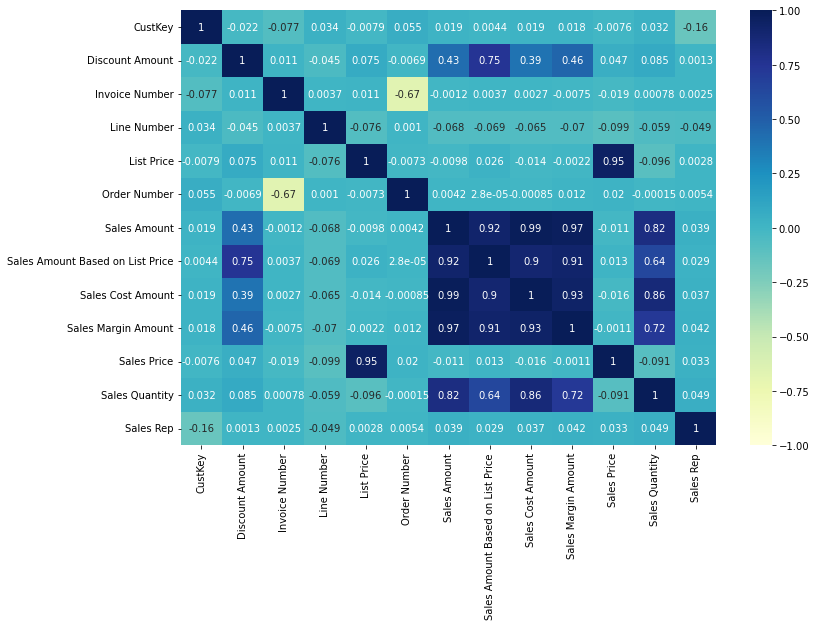

In [ ]:
# Checking the correlation
plt.figure(figsize=(12,8))
sns.heatmap(sales_data.corr(method='pearson'), annot=True, vmin=-1, vmax=1, cmap='YlGnBu')

### Observations:

* 1 Discount Amount is highly related to Sales Amount, Sales Cost Amount, Sales Amount Based on List Price & Sales Margin Amount and moderately related to Sales Quantity.
* 2- List Price highly related to sales price and has no relations with Sales amount, Sales cost amount, Sales amount based on list price & sales margin amount.
* 3- Sales quantity is moderately related to Sales amount, discount amount, sales margin amount.
* Their is no relation Between Sales Rep and Sales Amount, Sales Margin Amount.

In [ ]:
# set style
sns.set(style = 'darkgrid')

In [ ]:
DaySalesInsights = sales_data01.copy()
DaySalesInsights['Invoice_Date'] = pd.to_datetime(sales_data01['Invoice Date']).dt.date

In [ ]:
top10sales = DaySalesInsights.groupby('Invoice_Date').sum().sort_values('Sales Amount', ascending = False)
top10sales = top10sales.reset_index().head(10)

### Yearly Sales Record:

In [ ]:
Yearly_Sales =  sales_data02[['CustKey','Item','Invoice Date','Invoice_Year','Invoice_Month',
                            'Sales Quantity', 'Sales Amount Based on List Price','Discount Amount',
                           'Sales Amount', 'Sales Margin Amount','Sales Cost Amount','Sales Rep','U/M','List Price',
                           'Sales Price']]


,Invoice_Year,Sales Amount
0,2017,87416407.83
1,2018,20817471.00
2,2019,77906591.65


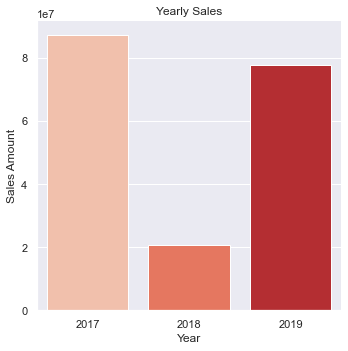

In [ ]:
Yearly_Sales01 = Yearly_Sales.groupby('Invoice_Year').sum().reset_index()
sns.catplot(y = 'Sales Amount', x = 'Invoice_Year', data = Yearly_Sales01, palette='Reds',kind="bar")
plt.xlabel('Year')
plt.ylabel('Sales Amount')
plt.title('Yearly Sales')
Yearly_Sales01[['Invoice_Year', 'Sales Amount']]

### Obseravtions:
*  From this plot, it is clear that Sales decreased continuously & then it started to increase from 2018 to 2019.

### Observations:
* From 2017-19 Highest Sales Amount 2017>2019>2018.

### Observations:
* Generally, from 2017 to 2019 total quantity of items on any particular day was in the range of `0` to `4000` items while the items amounted to between `$1` and `$200000`.

Text(0, 0.5, 'Count')

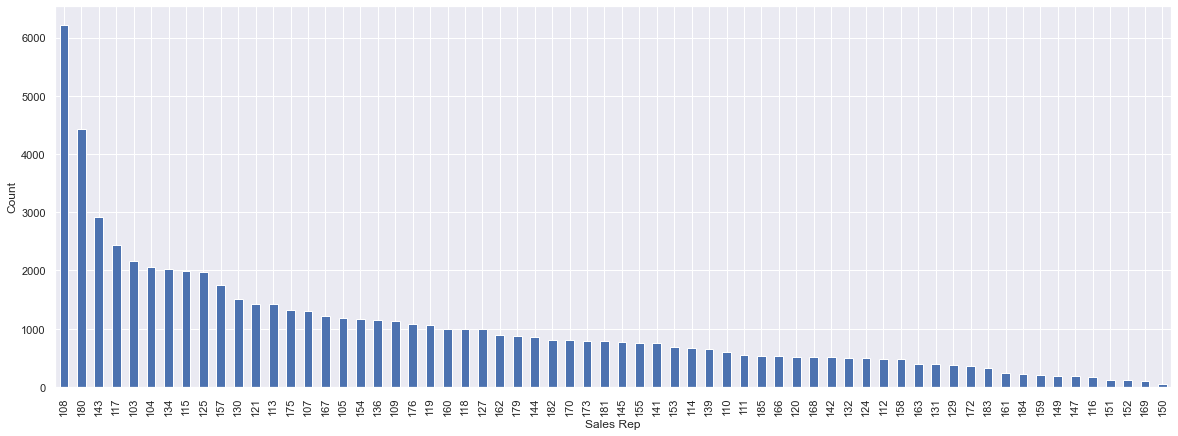

In [ ]:
plt.figure(figsize=(20, 7))
sales_data01['Sales Rep'].value_counts().plot.bar()
plt.xlabel('Sales Rep')
plt.ylabel('Count')

#### Sales Rep "108" were used most often while sales rep "150" has been used the least.

## Yearly-Monthwise Records:

In [ ]:
Yearly_Monthwise_Sales = sales_data02.groupby(['Invoice_Year','Invoice_Month']).sum().reset_index()
Yearly_Monthwise_Sales.iloc[:,6:].describe()

,Sales Amount Based on List Price,Discount Amount,Sales Amount,Sales Margin Amount,Sales Cost Amount,Sales Rep,List Price,Sales Price
count,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,27.000000,2.700000e+01,27.000000
mean,1.138197e+07,4.487882e+06,6.894091e+06,2.878090e+06,4.016002e+06,332055.962963,1.244452e+06,684427.100434
std,2.220965e+06,1.231280e+06,1.142842e+06,5.140723e+05,6.506092e+05,55275.936829,2.116445e+05,115921.969853
min,4.900167e+06,1.712686e+06,3.187481e+06,1.290189e+06,1.897292e+06,130314.000000,5.042254e+05,270807.438237
25%,1.077866e+07,4.024413e+06,6.461181e+06,2.617218e+06,3.688586e+06,306638.500000,1.143268e+06,620357.646120
50%,1.152212e+07,4.815936e+06,6.895858e+06,2.882060e+06,4.092856e+06,339909.000000,1.259842e+06,694170.910154
75%,1.278649e+07,5.277200e+06,7.600667e+06,3.134162e+06,4.370919e+06,366086.500000,1.365313e+06,752295.240603
max,1.472000e+07,6.112159e+06,8.783739e+06,3.807619e+06,5.041842e+06,404161.000000,1.558636e+06,873625.957968


## Monthly Records:

## Profits Records:

### Observations:
* In the scatterplot above, you can see that Sales Margin is mostly between `$1` and `$250000`.

## Yearly Month wise Records:

## Monthly Records:

### Observations:
* In Most cases, Sales Quantity was around 200 and Profits were around `$200000`.

###  Observations:
* Among the 10 CustKey that generated the most Sales Margin Amount, `CustKey-10021485` contributed around 30.57% of the Sales Margin Amount.

In [ ]:
Top10byCustKey18 = Yearly_Sales[Yearly_Sales['Invoice_Year']==2018].groupby(['Invoice_Year','CustKey']).sum()
Top10byCustKey18 = Top10byCustKey18.sort_values('Sales Margin Amount', ascending=False).reset_index().head(10)

###  Observations:
* Item `Better Large Canned Shrimp` contributed around 19.21% of Sales Margin amount among the 10 Items that generated the most Sales Margin Amount.

In [ ]:
High_Sales = sales_data01.groupby('Item').sum().sort_values('Sales Amount', ascending=False).reset_index()
High_Sales.index+=1
High_Sales=High_Sales.reset_index().rename(columns={"index":"Rank"})

,Rank,Item,Sales Amount
0,1,Better Large Canned Shrimp,15454172.47
1,2,High Top Dried Mushrooms,13367714.53
2,3,Red Spade Pimento Loaf,5711486.45
3,4,Better Canned Tuna in Oil,5693075.12
4,5,Ebony Squash,5380727.75
5,6,Big Time Frozen Cheese Pizza,5127171.17
6,7,Fast Mini Donuts,5009499.08
7,8,Better Fancy Canned Sardines,4975348.35
8,9,Discover Manicotti,4901139.48
9,10,Landslide White Sugar,4282290.62


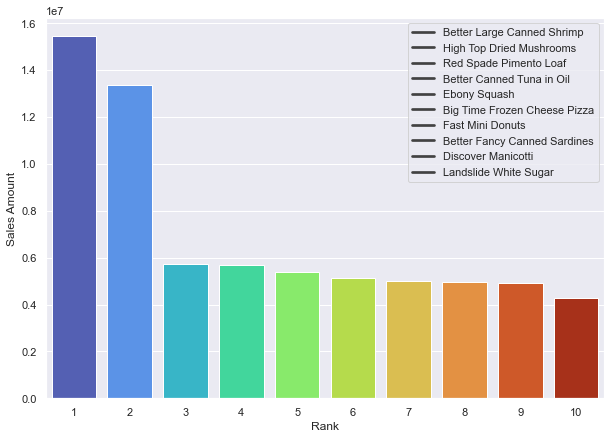

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x='Rank', y='Sales Amount',data = High_Sales.head(10), palette = 'turbo')
plt.legend(High_Sales['Item'].head(10))
High_Sales[['Rank', 'Item', 'Sales Amount']].head(10)

###  Observations:
* Item `Better Large Canned Shrimp` contributed around 22.11% of revenue among the 10 Items that generated the most revenue.

In [ ]:
High_SalesPrice = sales_data01.groupby('Item').sum().sort_values('Sales Price', ascending=False).reset_index()
High_SalesPrice.index+=1
High_SalesPrice=High_SalesPrice.reset_index().rename(columns={"index":"Rank"})

###  Observations:
* Item `Better Fancy Canned Sardines` contributed around 18.43% of Sales Price among the 10 Items.

In [ ]:
High_CostAmount = sales_data01.groupby('Item').sum().sort_values('Sales Cost Amount', ascending=False).reset_index()
High_CostAmount.index+=1
High_CostAmount=High_CostAmount.reset_index().rename(columns={"index":"Rank"})

### Observations:
* Maximum sales quantities were generated in the unit of measure "EA".

### Observations:
* Maximum mean level sales margin amounts were generated in "SE" U/M while minimum mean level of them in "PR" U/M.

## Observations:

* As seen from the pairplot above, it is quite clear that list price is very strongly positively correlated with sales price.
* A strong correlation exists between sales amount, sales cost amount, sales margin amount, and sales amount based on list price.
* Sales amount, sales cost amount, and sales margin amount are strongly correlated with discount amount.
* Sales quantity is moderately positively correlated to sales amount, sales cost amount, sales margin amount and sales amount based on list price.
* Sales cost amount and sales margin amount are strongly positively correlated.
* Customer key and sales rep are weakly negatively correlated.
* Sales price and sales quantity are weakly negatively correlated.
* Sales quantity and sales rep are very weakly negatively correlated.
* Sales rep is very weakly negatively correlated to both discount amount and sales cost amount.
* Sales rep is very weakly positively correlated to sales margin amount, in fact we can claim them to be independent of each other as well.
